# Download and examine a road network from OpenStreetMap <br>

Boeing, G. 2017. "OSMnx: New Methods for Acquiring, Constructing, Analyzing, and Visualizing Complex Street Networks." Computers, Environment and Urban Systems 65, 126-139. doi:10.1016/j.compenvurbsys.2017.05.004<br>

example from:
https://autogis-site.readthedocs.io/en/latest/lessons/lesson-6/retrieve-data-from-openstreetmap.html#

<br>
NetworkX citation: https://networkx.org/documentation/stable/index.html
Aric A. Hagberg, Daniel A. Schult and Pieter J. Swart, “Exploring network structure, dynamics, and function using NetworkX”, in Proceedings of the 7th Python in Science Conference (SciPy2008), Gäel Varoquaux, Travis Vaught, and Jarrod Millman (Eds), (Pasadena, CA USA), pp. 11–15, Aug 2008


In [2]:
import osmnx

city = "melbourne"
#PLACE_NAME = "Melbourne, Australia" # up to 47 sec for Birmingham, England
#PLACE_NAME = "Bourke Street Mall, Melbourne, Australia"
PLACE_NAME = "Russell Street, Melbourne, Australia"
graph = osmnx.graph_from_address(PLACE_NAME, network_type="drive", dist=500, truncate_by_edge=True, clean_periphery=True, simplify=True)

In [3]:
type(graph)

networkx.classes.multidigraph.MultiDiGraph

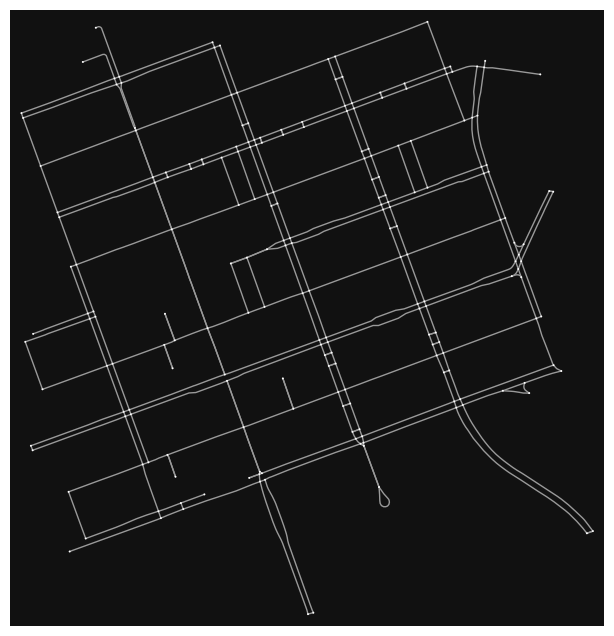

In [4]:
figure, ax = osmnx.plot_graph(graph, node_size=2)

In [5]:
nodes, edges = osmnx.graph_to_gdfs(graph)

In [6]:
type(nodes)

geopandas.geodataframe.GeoDataFrame

In [7]:
nodes

,y,x,highway,street_count,geometry
osmid,,,,,
26034662,-37.809868,144.966684,traffic_signals,4,POINT (144.96668 -37.80987)
26034663,-37.809157,144.969118,traffic_signals,4,POINT (144.96912 -37.80916)
26034664,-37.808418,144.971613,NaN,4,POINT (144.97161 -37.80842)
26034668,-37.809342,144.972047,NaN,4,POINT (144.97205 -37.80934)
26034669,-37.810808,144.967111,NaN,4,POINT (144.96711 -37.81081)
...,...,...,...,...,...
9756035315,-37.811151,144.965937,NaN,3,POINT (144.96594 -37.81115)
9756035316,-37.811249,144.965981,NaN,3,POINT (144.96598 -37.81125)
9756035317,-37.810821,144.967451,NaN,3,POINT (144.96745 -37.81082)


In [8]:
edges.head()

osmid  oneway  \
u        v          key                                              
26034662 1985557963 0                            323916048   False   
         2181268836 0                            187918254    True   
26034663 589403294  0                            323916050    True   
26034668 26034664   0                            198005395    True   
         277089929  0    [958571816, 958571818, 387266131]    True   

                                           name        highway maxspeed  \
u        v          key                                                   
26034662 1985557963 0    Little Lonsdale Street  living_street       20   
         2181268836 0            Russell Street       tertiary       40   
26034663 589403294  0    Little Lonsdale Street  living_street       20   
26034668 26034664   0             Spring Street   unclassified      NaN   
         277089929  0           Lonsdale Street       tertiary       40   

                         reversed   length  \
u        v          key                      
26034662 1985557963 0       False   13.469   
         2181268836 0       False  111.036   
26034663 589403294  0       False   16.263   
26034668 26034664   0       False  109.550   
         277089929  0       False   13.127   

                                                                  geometry  \
u        v          key                                                      
26034662 1985557963 0    LINESTRING (144.96668 -37.80987, 144.96683 -37...   
         2181268836 0    LINESTRING (144.96668 -37.80987, 144.96667 -37...   
26034663 589403294  0    LINESTRING (144.96912 -37.80916, 144.96929 -37...   
26034668 26034664   0    LINESTRING (144.97205 -37.80934, 144.97203 -37...   
         277089929  0    LINESTRING (144.97205 -37.80934, 144.97207 -37...   

                        lanes  ref bridge access width tunnel  
u        v          key                                        
26034662 1985557963 0     NaN  NaN    NaN    NaN   NaN    NaN  
         2181268836 0     NaN  NaN    NaN    NaN   NaN    NaN  
26034663 589403294  0     NaN  NaN    NaN    NaN   NaN    NaN  
26034668 26034664   0       2  NaN    NaN    NaN   NaN    NaN  
         277089929  0       2  NaN    NaN    NaN   NaN    NaN

In [9]:
edges["highway"].value_counts()

tertiary          206
living_street      51
tertiary_link      47
unclassified       46
secondary          25
primary             1
secondary_link      1
Name: highway, dtype: int64

In [10]:
# To overplot the shapefile of the Place Name
#area = osmnx.geocode_to_gdf(PLACE_NAME)

In [11]:
#type(area)

In [12]:
#area

In [13]:
#area.plot()

In [14]:
graph.is_directed()

True

# Save graph to local disk

In [23]:
import os
import errno
data_dir = "../"
print("Data directory ",data_dir)
path = os.path.join(data_dir,"OSM")

try:
    os.mkdir(path)
except OSError as exc:
    if exc.errno != errno.EEXIST:
        raise
    pass
print("Created directory OSM in ", data_dir)

osmnx.io.save_graphml(graph,filepath=os.path.join(path, city, city+".graphml"))

Data directory  ../
Created directory OSM in  ../


In [24]:
newgraph=osmnx.io.load_graphml(filepath=os.path.join(path,city,city+".graphml"))

In [22]:
# graph read in from disk is not equal to the graph written out ... 
newgraph == graph

False

In [20]:
type(newgraph)

networkx.classes.multidigraph.MultiDiGraph